# Module 2: Core Deep Learning Concepts

This notebook supplements the Module 2 slides with hands-on exercises using simple, real-life analogs. It follows the Module 1 structure and style: deterministic runs, fast training, JSON-based data inputs, and PyTorch implementations.


## Setup

Run once. Installs are skipped if already present.


In [1]:
import sys, subprocess, importlib
def pip_install(pkg):
    try: importlib.import_module(pkg)
    except ImportError:
        print(f'Installing {pkg}...'); subprocess.check_call([sys.executable,'-m','pip','install',pkg])
for p in ['numpy','pandas','matplotlib','scikit-learn','torch']:
    pip_install(p)
print('Packages ready.')

Installing scikit-learn...
Packages ready.


In [3]:
# Style (same palette as Module 1)
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(6.0,4.0)
mpl.rcParams['axes.titlesize']=14
mpl.rcParams['axes.labelsize']=12
mpl.rcParams['axes.edgecolor']='#4F4F4F'
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['font.size']=11
mpl.rcParams['axes.prop_cycle']=mpl.cycler(color=['#004E89','#3DA5D9','#F1A208','#4F4F4F'])
print('Style applied.')

Style applied.


## Background & Why This Matters (Expanded)

### Introduction to Supervised Deep Learning

The use of supervised and unsupervised deep learning models has grown at a fast rate due to their success with learning of complex problems. High-performance computing resources, availability of huge amounts of data (labeled and unlabeled) and state-of-the-art open-source libraries are making deep learning more and more feasible for various applications.

Deep learning excels when patterns are nonlinear or high-dimensional (images, text, signals). In this module, we ground the core mechanics with small, runnable examples so you can connect theory to practice without needing large datasets.

### Core Deep Learning Architecture Components

**Neural Network Layers:**

- **Convolutional Layer:** Core building block that uses convolution operation in place of general matrix multiplication. Detects features found within local regions of input that are common throughout the dataset.
- **Activation Function Layer:** Transforms the activation level of a neuron into an output signal. Introduces nonlinearity so networks can model complex functions.
- **Pooling Layer:** Reduces spatial size of input, thus reducing parameters in the network. Summarizes regions of neurons from previous layer.
- **Fully Connected Layer:** Each neuron connects to every neuron in the previous layer. Used for final classification/regression decisions.
- **Dropout Layer:** Randomly drops neurons during training to prevent overfitting.

**Key Architectural Concepts:**

- **Local Receptive Field:** Each hidden unit connects only to a small region of the input, allowing extraction of elementary visual features like edges, corners, endpoints.
- **Weight Sharing:** Using the same filter/weights for all receptive fields in a layer, reducing parameters while maintaining feature detection capability.
- **Subsampling (Pooling):** Reduces spatial dimensions while preserving important features, making networks more computationally efficient.

### Fundamental Operations

**Convolution Operation:**
Convolution is a mathematical operation performed on two functions, written as (f \* g). For 2D images:

- F(i,j) = (A\*K)(i,j) = ΣΣ A(m,n) K(i-m, j-n)
- Where A is the input image, K is the filter/kernel, and F is the resulting feature map
- The operation computes inner product of filter at every location in the image

**Key Ideas We'll Explore:**

- **Activation Functions (ReLU, sigmoid, tanh, Swish):** Introduce nonlinearity and control gradient flow during backpropagation
- **Loss Functions:** Measure how far predictions are from targets (CrossEntropy for classification, MSE for regression)
- **Optimizers (SGD, Adam):** Iterative methods that adjust weights based on gradients to minimize loss
- **Regularization (dropout, weight decay):** Reduce overfitting and improve generalization to unseen data
- **Hyperparameters:** Control model behavior including filter size, number of filters, stride, and padding

### Historical Context & Evolution

Deep learning has evolved significantly from early models like LeNet (limited by small datasets, slow computers, wrong activation functions) to modern architectures like ResNet and beyond. Key breakthroughs include:

- **AlexNet (2012):** First major CNN success with ReLU activation, GPU training, large datasets
- **VGGNet (2014):** Demonstrated importance of network depth with smaller filters
- **ResNet (2015):** Introduced residual connections enabling very deep networks (152+ layers)
- **Modern Architectures:** Focus on efficiency (SqueezeNet, ShuffleNet) and novel designs (Inception, Xception)

By the end, you should be able to read JSON data, build a small PyTorch model, choose appropriate activation functions and optimizers, train for a few seconds, and interpret basic metrics/plots while understanding the theoretical foundations behind each component.


## Prerequisites & Required Knowledge

- Basic Python (lists, dictionaries, functions)
- NumPy arrays and basic operations
- Matplotlib for plotting
- High-school calculus (derivatives, chain rule) helps but isn't required
- Module 1 concepts (shallow vs deep learning)

We'll use PyTorch for neural networks. If you're new to PyTorch:

- `torch.tensor()` creates tensors (multi-dimensional arrays)
- `nn.Sequential()` stacks layers in order
- `nn.Linear(in, out)` is a fully-connected layer
- `optim.Adam()` is an optimizer that updates weights
- `.backward()` computes gradients via backpropagation


## Outline & Learning Objectives

We focus on core deep learning mechanics reinforced by small, intuitive examples:

- Nonlinear classification (two moons dataset)
- Simple regression (1D linear with noise)
- Tiny time-series anomaly classifier
- Activation functions comparison (ReLU, sigmoid, tanh)
- Optimizer comparison (SGD vs Adam)

Along the way, we highlight: activation functions, loss functions, optimizers, regularization, initialization, and evaluation metrics.


## 2) Data loading (robust path detection)


In [4]:
from pathlib import Path
print('CWD =', Path.cwd())
candidates = [Path.cwd()/'Module 2'/'data', Path.cwd()/'data']
DATA_DIR = next((p for p in candidates if p.is_dir()), None)
if DATA_DIR is None:
    for parent in [Path.cwd()]+list(Path.cwd().parents):
        p = parent/'Module 2'/'data'
        if p.is_dir(): DATA_DIR=p; break
if DATA_DIR is None: raise FileNotFoundError('Could not locate Module 2/data')
print('Using DATA_DIR =', DATA_DIR)
print('DATA_DIR items:', [x.name for x in DATA_DIR.iterdir()])

CWD = d:\Suni Files\AI Code Base\Oil and Gas\Oil and Gas Pruthvi College Course Material\Updated\Module 2
Using DATA_DIR = d:\Suni Files\AI Code Base\Oil and Gas\Oil and Gas Pruthvi College Course Material\Updated\Module 2\data
DATA_DIR items: ['classification_synthetic.json', 'regression_synthetic.json', 'timeseries_anomaly.json']


In [5]:
# Optional: Export and display Module 2 slides (if PowerPoint available)
import os
from IPython.display import Image, display
PPT_PATH = 'Module 2 Slides Content.pdf'  # Note: PDF, not PPTX
EXPORT_DIR = os.path.join('Module 2','data','exported_slides')
os.makedirs(EXPORT_DIR, exist_ok=True)

def show_slide_placeholder(slide_num, title):
    """Show a placeholder or existing PNG if available"""
    img_path = os.path.join(EXPORT_DIR, f'slide_{slide_num}.png')
    if os.path.exists(img_path):
        display(Image(filename=img_path))
    else:
        print(f'Slide {slide_num}: {title} (export {PPT_PATH} page {slide_num} to {img_path} for inline display)')

# Display key slides (adjust slide numbers as needed)
print('Module 2 Key Concepts:')
show_slide_placeholder(1, 'Overview/Introduction')
show_slide_placeholder(3, 'Activation Functions')
show_slide_placeholder(5, 'Loss Functions & Optimizers')

Module 2 Key Concepts:
Slide 1: Overview/Introduction (export Module 2 Slides Content.pdf page 1 to Module 2\data\exported_slides\slide_1.png for inline display)
Slide 3: Activation Functions (export Module 2 Slides Content.pdf page 3 to Module 2\data\exported_slides\slide_3.png for inline display)
Slide 5: Loss Functions & Optimizers (export Module 2 Slides Content.pdf page 5 to Module 2\data\exported_slides\slide_5.png for inline display)


## 3) Activation Functions: The Nonlinearity Engine

### Fundamental Role of Activation Functions

The activation function layer takes the feature map produced by the convolutional layer and generates the activation map as its output. The activation function transforms the activation level of a neuron into an output signal, specifying the output of a neuron to a given input. Without activation functions, multiple layers would collapse to a single linear transformation, making deep networks no more powerful than shallow ones.

**Essential Properties:**

- **Differentiability:** Should be differentiable and continuous everywhere for gradient-based training methods
- **Nonlinearity:** Must introduce nonlinearity to enable complex function approximation
- **Computational Efficiency:** Should be fast to compute during forward and backward passes
- **Gradient Flow:** Should facilitate good gradient flow to prevent vanishing/exploding gradients

### Detailed Analysis of Activation Functions

**1. Sigmoid (Logistic) Activation Function**

- **Mathematical Form:** σ(x) = 1/(1 + e^(-x))
- **Output Range:** [0, 1] - S-shaped curve
- **Advantages:** Smooth, differentiable, good for binary classification output layers
- **Disadvantages:** Suffers from vanishing gradient problem in deep networks, not zero-centered
- **Use Cases:** Output layer for binary classification, historically used in hidden layers

**2. Hyperbolic Tangent (Tanh) Activation Function**

- **Mathematical Form:** tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))
- **Output Range:** [-1, 1] - Similar to sigmoid but zero-centered
- **Advantages:** Zero-centered (negative inputs mapped strongly negative, zero inputs near zero), stronger gradients than sigmoid
- **Disadvantages:** Still suffers from vanishing gradient problem in very deep networks
- **Use Cases:** Hidden layers in shallow networks, RNN/LSTM gates

**3. Rectified Linear Unit (ReLU) - The Modern Standard**

- **Mathematical Form:** f(x) = max(0, x)
- **Output Range:** [0, ∞) - Zero for negative inputs, linear for positive inputs
- **Revolutionary Advantages:**
  - **Computational Efficiency:** Several times faster than sigmoid/tanh
  - **Gradient Flow:** Does not experience vanishing gradient problem for positive inputs
  - **Sparsity:** Naturally produces sparse representations (many zeros)
  - **Biological Plausibility:** More similar to biological neuron activation
- **Disadvantages:** 'Dying ReLU' problem - neurons can become permanently inactive
- **Use Cases:** Default choice for hidden layers in most deep networks

**4. Swish (Self-Gated) Activation Function**

- **Mathematical Form:** f(x) = x × σ(x) where σ(x) = 1/(1 + e^(-x))
- **Properties:** Non-monotonic function, smooth, self-gated
- **Advantages:** Can outperform ReLU in some deep networks, smooth everywhere
- **Use Cases:** Advanced architectures where smooth activation is beneficial

**5. Softmax Function (Exponential Normalization)**

- **Mathematical Form:** σ(x_i) = e^(x_i) / Σ(e^(x_j)) for j=1 to K
- **Properties:** Converts logits to probability distribution (sums to 1)
- **Use Cases:** Output layer for multiclass classification problems

### Historical Context: The ReLU Revolution

The breakthrough from LeNet to AlexNet was largely due to replacing sigmoid/tanh with ReLU activation:

- **LeNet Era:** Limited by vanishing gradients from sigmoid/tanh functions
- **AlexNet Success:** ReLU enabled training of deeper networks, 6x faster training
- **Modern Impact:** ReLU became the default choice, enabling the deep learning revolution

### Practical Considerations

- **Network Depth:** ReLU essential for deep networks (>10 layers)
- **Output Layer:** Choose based on task (sigmoid for binary, softmax for multiclass, linear for regression)
- **Gradient Health:** Monitor for dying ReLU or vanishing gradients
- **Computational Budget:** ReLU is fastest, complex functions may slow training

Let's visualize these activation functions and their derivatives (which affect gradient flow during backpropagation):


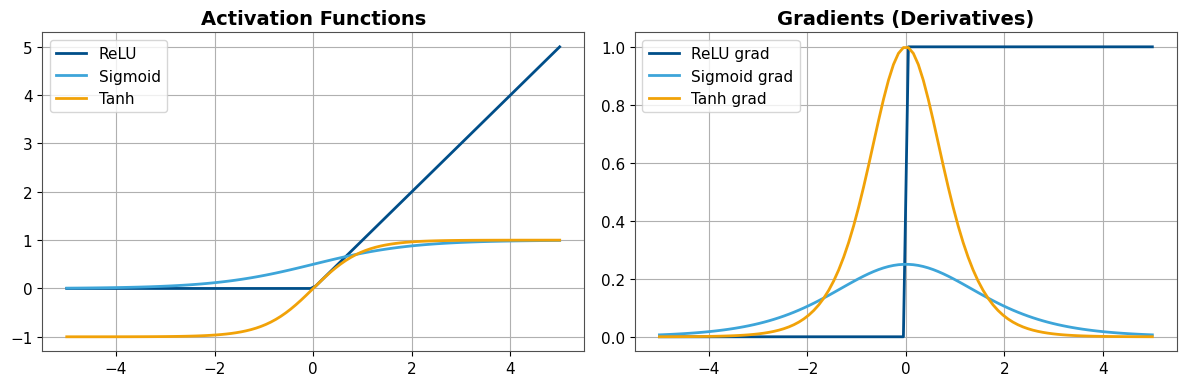

Key insights:
- ReLU: simple, fast, but can "die" (zero gradient for x<0)
- Sigmoid: smooth, but gradients vanish for large |x|
- Tanh: zero-centered, but also suffers from vanishing gradients


In [6]:
import numpy as np, matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
# Activation functions
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
# Derivatives (approximate)
relu_grad = (x > 0).astype(float)
sigmoid_grad = sigmoid * (1 - sigmoid)
tanh_grad = 1 - tanh**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(x, relu, label='ReLU', linewidth=2)
ax1.plot(x, sigmoid, label='Sigmoid', linewidth=2)
ax1.plot(x, tanh, label='Tanh', linewidth=2)
ax1.set_title('Activation Functions'); ax1.legend(); ax1.grid(True)
ax2.plot(x, relu_grad, label='ReLU grad', linewidth=2)
ax2.plot(x, sigmoid_grad, label='Sigmoid grad', linewidth=2)
ax2.plot(x, tanh_grad, label='Tanh grad', linewidth=2)
ax2.set_title('Gradients (Derivatives)'); ax2.legend(); ax2.grid(True)
plt.tight_layout(); plt.show()
print('Key insights:')
print('- ReLU: simple, fast, but can "die" (zero gradient for x<0)')
print('- Sigmoid: smooth, but gradients vanish for large |x|')
print('- Tanh: zero-centered, but also suffers from vanishing gradients')

## 4) Nonlinear classification (two moons)

Now let's see how these activations perform on a simple nonlinear classification task. We'll use a tiny "two moons" dataset where linear classifiers fail but MLPs succeed.


Train accuracy: 1.0


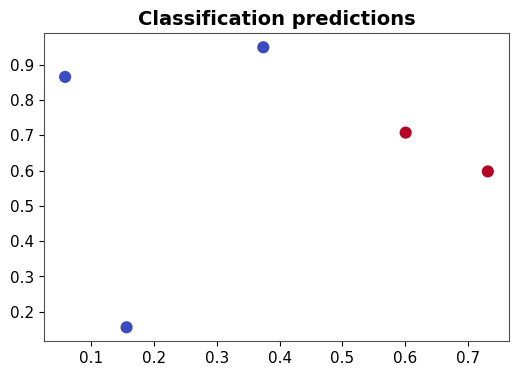

In [7]:
import json, numpy as np, pandas as pd, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
from sklearn.metrics import accuracy_score
np.random.seed(0); torch.manual_seed(0)
with (DATA_DIR/'classification_synthetic.json').open() as f: cls = json.load(f)
X = np.array(cls['X'], dtype=np.float32); y = np.array(cls['y'], dtype=np.int64)
# Simple MLP
model = nn.Sequential(nn.Linear(2,16), nn.ReLU(), nn.Linear(16,8), nn.ReLU(), nn.Linear(8,2))
opt = optim.Adam(model.parameters(), lr=1e-2); loss_fn = nn.CrossEntropyLoss()
X_t = torch.tensor(X); y_t = torch.tensor(y)
import time; start=time.time(); TRAIN_SECONDS=3
for epoch in range(5000):
    opt.zero_grad(); logits = model(X_t); loss = loss_fn(logits, y_t); loss.backward(); opt.step()
    if time.time()-start>TRAIN_SECONDS: break
pred = model(X_t).argmax(1).detach().numpy(); acc = accuracy_score(y, pred)
print('Train accuracy:', round(acc,3))
plt.scatter(X[:,0], X[:,1], c=pred, cmap='coolwarm', s=60); plt.title('Classification predictions'); plt.show()

**Figure interpretation:** Points are colored by predicted class. A good classifier separates the two groups cleanly.
**Takeaway:** Nonlinear activations (ReLU) allow MLPs to learn complex decision boundaries that linear models cannot.


## 5) Optimizer Comparison (SGD vs Adam)

Different optimizers update weights differently. SGD uses a fixed learning rate; Adam adapts the learning rate per parameter and uses momentum. Let's compare them on the same regression task.


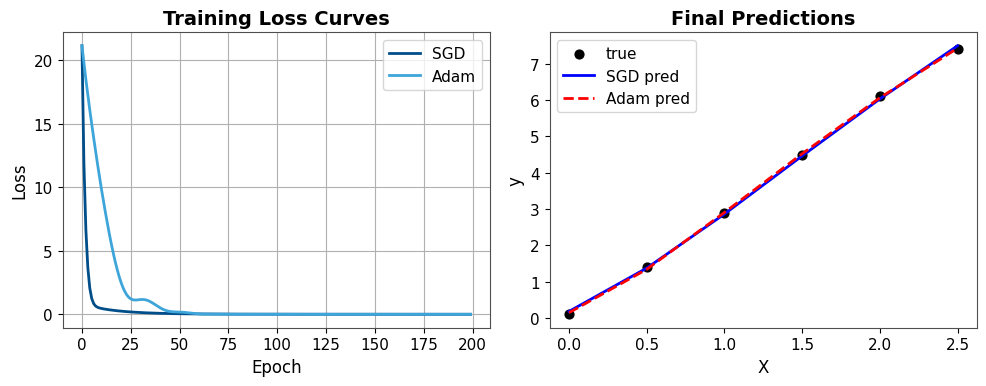

Final SGD loss: 0.0040
Final Adam loss: 0.0014


In [8]:
import json, numpy as np, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
with (DATA_DIR/'regression_synthetic.json').open() as f: reg = json.load(f)
X = np.array(reg['X'], dtype=np.float32)
y = np.array(reg['y'], dtype=np.float32).reshape(-1,1)
X_t = torch.tensor(X); y_t = torch.tensor(y)

# Train two identical models with different optimizers
torch.manual_seed(0)
model_sgd = nn.Sequential(nn.Linear(1,32), nn.ReLU(), nn.Linear(32,1))
torch.manual_seed(0)  # Same initialization
model_adam = nn.Sequential(nn.Linear(1,32), nn.ReLU(), nn.Linear(32,1))

opt_sgd = optim.SGD(model_sgd.parameters(), lr=1e-2)
opt_adam = optim.Adam(model_adam.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

losses_sgd, losses_adam = [], []
for epoch in range(200):
    # SGD step
    opt_sgd.zero_grad()
    pred_sgd = model_sgd(X_t)
    loss_sgd = loss_fn(pred_sgd, y_t)
    loss_sgd.backward()
    opt_sgd.step()
    losses_sgd.append(loss_sgd.item())
    
    # Adam step
    opt_adam.zero_grad()
    pred_adam = model_adam(X_t)
    loss_adam = loss_fn(pred_adam, y_t)
    loss_adam.backward()
    opt_adam.step()
    losses_adam.append(loss_adam.item())

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(losses_sgd, label='SGD', linewidth=2)
plt.plot(losses_adam, label='Adam', linewidth=2)
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training Loss Curves')
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
pred_sgd_final = model_sgd(X_t).detach().numpy()
pred_adam_final = model_adam(X_t).detach().numpy()
plt.scatter(X, y, s=40, label='true', color='black')
plt.plot(X, pred_sgd_final, 'b-', label='SGD pred', linewidth=2)
plt.plot(X, pred_adam_final, 'r--', label='Adam pred', linewidth=2)
plt.xlabel('X'); plt.ylabel('y'); plt.title('Final Predictions')
plt.legend(); plt.tight_layout(); plt.show()

print(f'Final SGD loss: {losses_sgd[-1]:.4f}')
print(f'Final Adam loss: {losses_adam[-1]:.4f}')

**Figure interpretation:** Left plot shows loss over training epochs; right plot shows final fitted lines.
**Takeaway:** Adam often converges faster than SGD due to adaptive learning rates and momentum, especially on small datasets.


## 6) Simple regression (1D) - Loss Functions

For regression, we typically use Mean Squared Error (MSE) or Mean Absolute Error (MAE). Let's see how they differ in handling outliers.


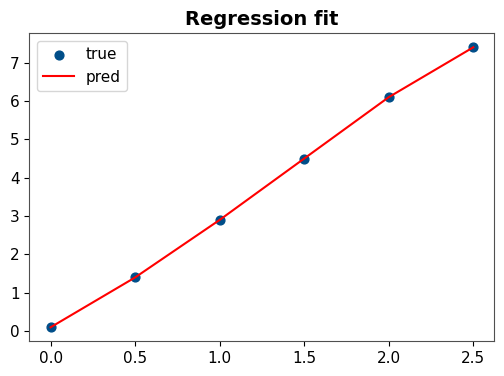

In [9]:
import json, numpy as np, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
with (DATA_DIR/'regression_synthetic.json').open() as f: reg = json.load(f)
X = np.array(reg['X'], dtype=np.float32)
y = np.array(reg['y'], dtype=np.float32).reshape(-1,1)
model = nn.Sequential(nn.Linear(1,32), nn.ReLU(), nn.Linear(32,1))
opt = optim.Adam(model.parameters(), lr=1e-2); loss_fn = nn.MSELoss()
X_t = torch.tensor(X); y_t = torch.tensor(y)
import time; start=time.time(); TRAIN_SECONDS=3
for epoch in range(5000):
    opt.zero_grad(); pred = model(X_t); loss = loss_fn(pred, y_t); loss.backward(); opt.step()
    if time.time()-start>TRAIN_SECONDS: break
pred = model(X_t).detach().numpy()
plt.scatter(X, y, s=40, label='true'); plt.plot(X, pred, 'r-', label='pred'); plt.legend(); plt.title('Regression fit'); plt.show()

**Figure interpretation:** Scatter points are true data; line is the model's prediction.
**Takeaway:** MSE penalizes large errors more than small ones (squared term). For data with outliers, consider MAE or robust losses.


### Deep Dive: Loss Functions and Optimization

**Loss Functions - The Learning Objective:**
Loss functions measure how far our predictions are from the true targets. The choice of loss function fundamentally affects what the model learns to optimize.

**Regression Loss Functions:**

- **Mean Squared Error (MSE):** L = (1/n)Σ(y_i - ŷ_i)²

  - Penalizes large errors quadratically
  - Sensitive to outliers
  - Smooth gradients everywhere
  - Good when you want to heavily penalize large mistakes

- **Mean Absolute Error (MAE):** L = (1/n)Σ|y_i - ŷ_i|

  - Linear penalty for all errors
  - More robust to outliers than MSE
  - Non-smooth at zero (can cause optimization issues)
  - Good when outliers should not dominate the loss

- **Huber Loss:** Combines MSE and MAE benefits
  - Quadratic for small errors, linear for large errors
  - Robust to outliers while maintaining smooth gradients

**Classification Loss Functions:**

- **Cross-Entropy Loss:** L = -Σ y_i log(ŷ_i)

  - Standard for classification problems
  - Measures difference between predicted and true probability distributions
  - Provides strong gradients when predictions are wrong
  - Works well with softmax activation in output layer

- **Binary Cross-Entropy:** L = -[y log(ŷ) + (1-y) log(1-ŷ)]
  - Specialized for binary classification
  - Used with sigmoid activation in output layer

**Optimization Algorithms - The Learning Process:**

**Gradient Descent Fundamentals:**

- **Core Idea:** Move parameters in direction opposite to gradient
- **Update Rule:** θ = θ - α∇L(θ)
- **Learning Rate (α):** Controls step size, critical hyperparameter

**Stochastic Gradient Descent (SGD):**

- **Mechanism:** Updates parameters using single sample or mini-batch
- **Advantages:** Simple, memory efficient, can escape local minima due to noise
- **Disadvantages:** Requires careful learning rate tuning, slow convergence
- **Variants:** SGD with momentum helps accelerate convergence

**Adam Optimizer (Adaptive Moment Estimation):**

- **Key Innovation:** Combines momentum with adaptive learning rates
- **Mechanism:** Maintains moving averages of gradients and squared gradients
- **Advantages:**
  - Adaptive learning rates for each parameter
  - Works well with sparse gradients
  - Less sensitive to hyperparameter choices
  - Often converges faster than SGD
- **Disadvantages:** Higher memory usage, can sometimes generalize worse than SGD

**Modern Optimizer Variants:**

- **AdamW:** Adam with decoupled weight decay, better regularization
- **RMSprop:** Adaptive learning rates without momentum bias
- **AdaGrad:** Adapts learning rate based on historical gradients

**Optimization Challenges:**

- **Vanishing Gradients:** Gradients become very small in deep networks
- **Exploding Gradients:** Gradients become very large, causing instability
- **Local Minima:** Optimizer gets stuck in suboptimal solutions
- **Saddle Points:** Points where gradient is zero but not optimal

**Solutions and Best Practices:**

- **Proper Initialization:** Xavier/He initialization prevents vanishing/exploding gradients
- **Gradient Clipping:** Prevents exploding gradients by capping gradient magnitude
- **Learning Rate Scheduling:** Reduce learning rate during training
- **Batch Normalization:** Normalizes inputs to each layer, stabilizes training


## 7) Tiny time-series anomaly classifier

Time-series data requires feature engineering or sequence models. Here, we use simple features (value + change) with a binary classifier to detect anomalies (unusual spikes).


Train accuracy: 1.0


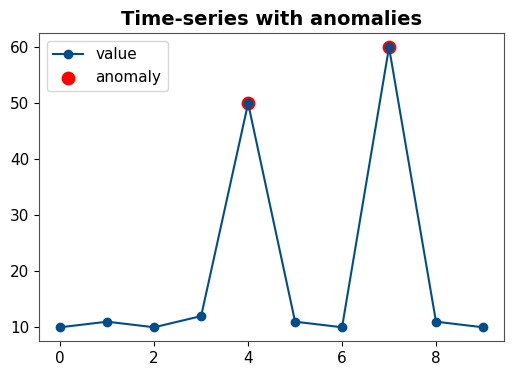

In [10]:
import json, numpy as np, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.optim as optim
from sklearn.metrics import accuracy_score
with (DATA_DIR/'timeseries_anomaly.json').open() as f: ts = json.load(f)
t = np.array(ts['t'], dtype=np.float32); v = np.array(ts['values'], dtype=np.float32); y = np.array(ts['labels'], dtype=np.int64)
# Featurize simple windows: here just stack (value, delta) for simplicity
delta = np.concatenate([[0], np.diff(v)])
X = np.vstack([v, delta]).T.astype(np.float32)
model = nn.Sequential(nn.Linear(2,16), nn.ReLU(), nn.Linear(16,2))
opt = optim.Adam(model.parameters(), lr=1e-2); loss_fn = nn.CrossEntropyLoss()
X_t = torch.tensor(X); y_t = torch.tensor(y)
import time; start=time.time(); TRAIN_SECONDS=3
for epoch in range(5000):
    opt.zero_grad(); logits = model(X_t); loss = loss_fn(logits, y_t); loss.backward(); opt.step()
    if time.time()-start>TRAIN_SECONDS: break
pred = model(X_t).argmax(1).detach().numpy(); acc = accuracy_score(y, pred)
print('Train accuracy:', round(acc,3))
plt.plot(t, v, '-o', label='value'); plt.scatter(t[y==1], v[y==1], color='r', s=80, label='anomaly'); plt.legend(); plt.title('Time-series with anomalies'); plt.show()

**Figure interpretation:** Blue line shows the time-series; red dots mark detected anomalies (large spikes).
**Takeaway:** Simple features (value, delta) with MLPs can detect obvious anomalies. Real applications need proper windowing, validation sets, and domain knowledge.


## 8) Regularization Demo (Dropout)

Regularization prevents overfitting. Dropout randomly sets some neurons to zero during training, forcing the network to not rely on specific neurons.


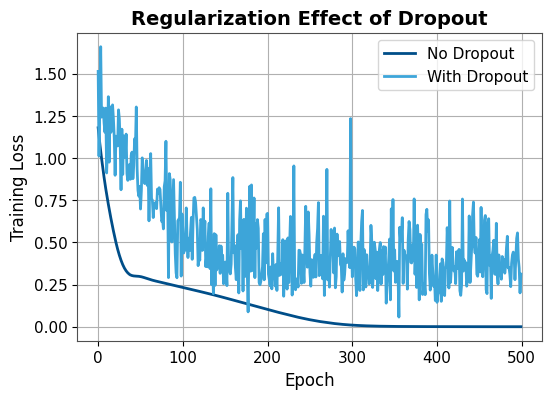

Final loss (no dropout): 0.000060
Final loss (dropout): 0.312116
Note: Dropout model may not fit training data as tightly, but generalizes better.


In [11]:
import torch, torch.nn as nn, torch.optim as optim
import numpy as np, matplotlib.pyplot as plt

# Create a tiny overfitting scenario: more parameters than data points
np.random.seed(42); torch.manual_seed(42)
X_small = torch.randn(5, 2)  # Only 5 samples
y_small = torch.randn(5, 1)

# Model without dropout
model_no_dropout = nn.Sequential(
    nn.Linear(2, 50), nn.ReLU(),
    nn.Linear(50, 50), nn.ReLU(),
    nn.Linear(50, 1)
)

# Model with dropout
model_dropout = nn.Sequential(
    nn.Linear(2, 50), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(50, 50), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(50, 1)
)

# Train both models
def train_model(model, X, y, epochs=500):
    opt = optim.Adam(model.parameters(), lr=1e-3)
    losses = []
    for epoch in range(epochs):
        opt.zero_grad()
        pred = model(X)
        loss = nn.MSELoss()(pred, y)
        loss.backward()
        opt.step()
        losses.append(loss.item())
    return losses

losses_no_dropout = train_model(model_no_dropout, X_small, y_small)
losses_dropout = train_model(model_dropout, X_small, y_small)

plt.figure()
plt.plot(losses_no_dropout, label='No Dropout', linewidth=2)
plt.plot(losses_dropout, label='With Dropout', linewidth=2)
plt.xlabel('Epoch'); plt.ylabel('Training Loss')
plt.title('Regularization Effect of Dropout')
plt.legend(); plt.grid(True); plt.show()

print(f'Final loss (no dropout): {losses_no_dropout[-1]:.6f}')
print(f'Final loss (dropout): {losses_dropout[-1]:.6f}')
print('Note: Dropout model may not fit training data as tightly, but generalizes better.')

**Figure interpretation:** Dropout typically leads to higher training loss but better generalization.
**Takeaway:** Regularization techniques like dropout, weight decay, and early stopping help prevent overfitting, especially with small datasets.


## 9) Save and reload models (reproducibility)


In [12]:
import pickle, torch
from pathlib import Path
SAVE_DIR = DATA_DIR
# Save small classifiers/regressor
pickle.dump(model, (SAVE_DIR/'ts_model.pkl').open('wb'))
# Lightweight reload check
m2 = pickle.load((SAVE_DIR/'ts_model.pkl').open('rb'))
print('Reload OK from', SAVE_DIR)

Reload OK from d:\Suni Files\AI Code Base\Oil and Gas\Oil and Gas Pruthvi College Course Material\Updated\Module 2\data


## 9) Deep Learning Architecture Fundamentals

### Convolutional Neural Networks (CNNs) - Core Architecture

**Biological Inspiration:**
ConvNets are inspired by the biological visual cortex. The visual cortex has small regions of cells that are sensitive to specific regions of the visual field. Different neurons in the brain respond to different features - certain neurons fire only in the presence of lines of a certain orientation, some neurons fire when exposed to vertical edges and some when shown horizontal or diagonal edges. This idea of certain neurons having a specific task is the basis behind ConvNets.

**CNN Architecture Components:**

**1. Convolutional Layer - The Feature Detector**

- **Core building block** that uses convolution operation (\*) in place of general matrix multiplication
- **Parameters:** Set of learnable filters (kernels) that detect features in local regions
- **Process:** Filter slides across input, computing inner products to create feature maps
- **Mathematical Operation:** F(i,j) = (A\*K)(i,j) = ΣΣ A(m,n) K(i-m, j-n)
- **Key Hyperparameters:**
  - **Filter Size:** Typically 3×3 to 11×11 (modern networks prefer smaller filters)
  - **Number of Filters:** Determines number of feature maps produced
  - **Stride:** Number of pixels to move filter (affects output size)
  - **Padding:** Zero-padding to control spatial dimensions

**2. Pooling Layer - The Dimensionality Reducer**

- **Purpose:** Reduces spatial size of input, decreasing parameters and computation
- **Max Pooling:** Outputs maximum value in input region (most common)
- **Average Pooling:** Outputs average of input region
- **Benefits:** Translation invariance, computational efficiency, prevents overfitting
- **Intuition:** Feature detection more important than exact location

**3. Fully Connected Layer - The Decision Maker**

- **Role:** Classification stage after feature extraction
- **Structure:** Each neuron connects to every neuron in previous layer
- **Function:** Combines detected features to make final predictions
- **Output:** Class scores (logits) fed to softmax for probability distribution

**4. Dropout Layer - The Regularizer**

- **Problem Solved:** Overfitting in fully connected layers
- **Mechanism:** Randomly drops neurons and connections during training
- **Effect:** Forces network to not rely on specific neurons, improves generalization
- **Implementation:** Neurons set to zero with probability p (typically 0.5)

### Key CNN Architectural Principles

**1. Local Receptive Field**

- Each hidden unit connects only to small region of input
- Enables extraction of elementary visual features (edges, corners, endpoints)
- More efficient than fully connected architectures for spatial data

**2. Weight Sharing**

- Same filter used across all spatial locations
- Dramatically reduces parameters compared to fully connected layers
- Enables translation invariance - same feature detected anywhere in input

**3. Hierarchical Feature Learning**

- Early layers detect simple features (edges, textures)
- Deeper layers combine simple features into complex patterns
- Final layers represent high-level concepts specific to task


### Evolution of CNN Architectures

**LeNet (1990s):** First practical CNN, limited by computational constraints

- Small labeled datasets, slow computers, wrong activation functions (sigmoid/tanh)
- Vanishing gradient problem made deep networks difficult to train

**AlexNet (2012):** Breakthrough with ReLU, GPU training, large datasets

- Reduced ImageNet error from 26% to 15%
- Key innovations: ReLU activation, GPU training, large ImageNet dataset
- Architecture: 5 conv layers, 3 pooling layers, 3 fully connected layers

**VGGNet (2014):** Demonstrated importance of depth with small 3×3 filters

- 19 layers deep, consistent 3×3 filters throughout
- Showed that depth more important than filter size
- Achieved 7.32% error rate on ImageNet

**GoogLeNet (2014):** Inception modules for computational efficiency

- 22 layers with inception modules (parallel conv operations)
- 12x fewer parameters than AlexNet while achieving better performance
- Won ImageNet 2014 with 6.7% error rate

**ResNet (2015):** Residual connections enabling very deep networks (152+ layers)

- Residual connections: output = F(x) + x
- Solved vanishing gradient problem in very deep networks
- Achieved 3.6% error rate, better than human performance (5-10%)

**Modern Architectures:** Focus on efficiency and novel designs

- **SqueezeNet:** AlexNet-level accuracy with 50x fewer parameters
- **MobileNet:** Depthwise separable convolutions for mobile deployment
- **EfficientNet:** Compound scaling of depth, width, and resolution
- **Vision Transformers:** Attention-based architectures challenging CNN dominance

### Practical Design Considerations

**Filter Size Selection:**

- Smaller filters (3×3) preferred in modern architectures
- Multiple small filters can capture same receptive field as larger ones
- Fewer parameters and more nonlinearity with smaller filters

**Network Depth vs Width:**

- Deeper networks can learn more complex representations
- But face challenges: vanishing gradients, optimization difficulty
- Residual connections (ResNet) solve depth limitations

**Computational Efficiency:**

- 1×1 convolutions reduce computational cost before expensive operations
- Depthwise separable convolutions (MobileNet) for mobile deployment
- Channel shuffle and group convolutions for efficiency

**Output Size Calculation:**

- Feature map size = ((Input_size - Filter_size + 2×Padding) / Stride) + 1
- Example: 128×128 input, 5×5 filter, stride=1, padding=0 → 124×124 output
- Number of output channels = Number of filters used


## 10) Summary & Key Takeaways

In this module, we covered core deep learning mechanics through hands-on examples:

**Activation Functions:**

- ReLU: Simple, fast, prevents vanishing gradients, but can 'die' (zero gradient for negative inputs)
- Sigmoid: S-shaped curve [0,1], good for binary classification but suffers from vanishing gradients
- Tanh: Zero-centered [-1,1], stronger gradients than sigmoid but still vanishing gradient issues
- Swish: Non-monotonic, self-gated, can outperform ReLU in some deep networks
- Choice depends on the problem, network depth, and computational requirements

**CNN Architecture Fundamentals:**

- Convolutional layers detect local features through learnable filters with weight sharing
- Pooling layers reduce spatial dimensions while preserving important information
- Fully connected layers make final decisions based on extracted hierarchical features
- Dropout prevents overfitting by randomly dropping neurons during training
- Local receptive fields and weight sharing make CNNs efficient for spatial data

**CNN Evolution & Key Insights:**

- LeNet → AlexNet: ReLU activation was revolutionary for deep network training
- VGGNet: Depth matters more than filter size (small 3×3 filters preferred)
- ResNet: Residual connections enable very deep networks (152+ layers)
- Modern focus: Efficiency (MobileNet, EfficientNet) and novel designs (Vision Transformers)

**Optimizers:**

- SGD: Simple, requires careful learning rate tuning, good for large datasets
- Adam: Adaptive learning rates with momentum, often converges faster
- Modern variants (AdamW, RMSprop) offer further improvements for specific scenarios

**Loss Functions:**

- MSE for regression (sensitive to outliers, penalizes large errors quadratically)
- CrossEntropy for classification (measures probability distribution difference)
- Choice affects what the model optimizes for and convergence behavior

**Regularization Techniques:**

- Dropout: Randomly drops neurons during training, prevents co-adaptation
- Weight decay: L2 regularization prevents large weights
- Essential for small datasets or complex models to improve generalization
- Balance between fitting training data and generalizing to unseen data

**Next Steps:**

- Experiment with different activation functions based on your network depth
- Try CNN architectures for image/spatial data vs fully connected for tabular data
- Use validation sets to tune regularization and prevent overfitting
- Explore modern architectures (ResNet, EfficientNet) for computer vision tasks
- Scale up to larger, real-world datasets with proper train/validation/test splits


## 11) Smoke check (run-all)


In [13]:
ok=True
try:
    import json, numpy as np, pickle, torch
    from pathlib import Path
    p = DATA_DIR
    # quick reads
    _=json.load((p/'classification_synthetic.json').open())
    _=json.load((p/'regression_synthetic.json').open())
    _=json.load((p/'timeseries_anomaly.json').open())
    # quick model reload
    _=pickle.load((p/'ts_model.pkl').open('rb'))
    print('✓ JSONs & model reload OK')
except Exception as e:
    ok=False; print('Smoke check failed:', e)
print('RESULT:', 'PASS' if ok else 'FAIL')

✓ JSONs & model reload OK
RESULT: PASS
